In [ ]:
!pip install ucimlrepo
!pip install pandas

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
data = adult.data
_X = data.features
_y = data.targets
n = len(_y) # 48842

# # metadata
print(adult.metadata)
# # variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [4]:
# print(y['income'].nunique()) # <=50k <=50k. >50k >50k.
_y['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [5]:
y_ = (_y.mask(_y =='<=50K.', False)
       .mask(_y =='<=50K', False)
       .mask(_y =='>50K.', True)
       .mask(_y =='>50K', True)
      )
print(y_['income'].value_counts() / len(y_))
y_['income'].value_counts()

False    0.760718
True     0.239282
Name: income, dtype: float64


False    37155
True     11687
Name: income, dtype: int64

In [6]:
_X.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [7]:
values = n * (_X.shape[1] + 1) # 683788 = 48842 * (14 + 1)
missed = _X.isnull().sum().sum()
print(f'{missed / values * 100:.3f}%') # 0.301%

0.301%


In [8]:
_X['capital-gain']

0        2174
1           0
2           0
3           0
4           0
         ... 
48837       0
48838       0
48839       0
48840    5455
48841       0
Name: capital-gain, Length: 48842, dtype: int64

8.261% with capital gain > 0


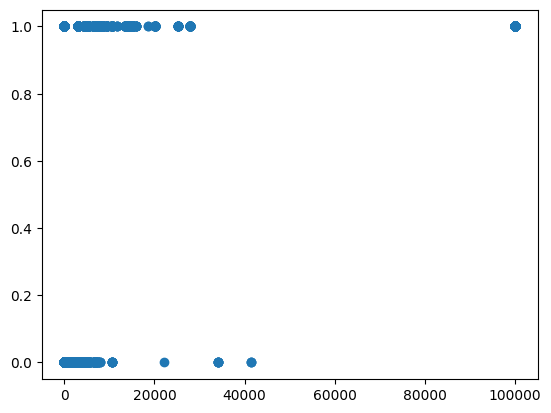

In [9]:
import numpy as np
from matplotlib import pyplot as plt

gain = _X['capital-gain']
print(f'{gain.where(gain > 0, np.nan).count() / n * 100:.3f}% with capital gain > 0')
income = y_['income']
plt.scatter(gain,income)
pass

In [10]:
gain.quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005        0.0
0.010        0.0
0.050        0.0
0.100        0.0
0.500        0.0
0.900        0.0
0.950     5013.0
0.990    15024.0
0.995    41310.0
Name: capital-gain, dtype: float64

In [11]:
rows_to_drop = _X[(gain < gain.quantile(0.005)) | (gain > gain.quantile(0.995))].index
X = _X.drop(rows_to_drop)
y = y_.drop(rows_to_drop)
print(f'{len(rows_to_drop) / n * 100:.2f}% is droped')

0.50% is droped


In [12]:
_X.quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

<ipython-input-12-c053afe4cd95>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  _X.quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0.005,17.0,24093.28,2.0,0.0,0.0,5.00
0.010,17.0,27166.00,3.0,0.0,0.0,8.00
0.050,19.0,39615.40,5.0,0.0,0.0,17.05
0.100,22.0,65738.20,7.0,0.0,0.0,24.00
0.500,37.0,178144.50,10.0,0.0,0.0,40.00
0.900,58.0,328466.00,13.0,0.0,0.0,55.00
0.950,63.0,379481.65,14.0,5013.0,0.0,60.00
0.990,74.0,509484.42,16.0,15024.0,2001.0,80.00
0.995,78.0,589809.00,16.0,41310.0,2258.0,84.00
